<a href="https://colab.research.google.com/github/Ekpenyong-Esu/Reinforcement-Leaening-Exercise/blob/main/Logistic_regression-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#load libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist


In [27]:
#Download the dataset
((train_data, train_labels),(test_data, test_labels)) = mnist.load_data()

In [28]:
train_data = train_data/np.float32(255)   # We normalize the image by dividing it by 255

from tensorflow.keras.utils import to_categorical # To categorical convert it to a class of 10 categories

train_labels = to_categorical(train_labels) # We convert the label to numpy int 32


test_data = test_data/np.float32(255)


test_labels = to_categorical(test_labels)


In [29]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [30]:
#Creating the model

model = K.Sequential([
                      Flatten(input_shape=(28, 28)),  # The flatten, flatten the input from 28 by 28 to 784
                      Dense(128,  activation='relu'),
                      Dense(64,  activation='relu'),
                      Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
history = model.fit(x=train_data,y=train_labels, epochs=50, verbose=1, validation_data=(test_data, test_labels))

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0535 - accuracy: 0.9175 - val_loss: 0.0254 - val_accuracy: 0.9615
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0207 - accuracy: 0.9691 - val_loss: 0.0179 - val_accuracy: 0.9711
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0141 - accuracy: 0.9792 - val_loss: 0.0147 - val_accuracy: 0.9758
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0106 - accuracy: 0.9848 - val_loss: 0.0150 - val_accuracy: 0.9751
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0082 - accuracy: 0.9883 - val_loss: 0.0148 - val_accuracy: 0.9780
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0067 - accuracy: 0.9905 - val_loss: 0.0154 - val_accuracy: 0.9784
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0054 - accuracy: 0.9926 - val_loss: 0.0143 - val_accuracy:

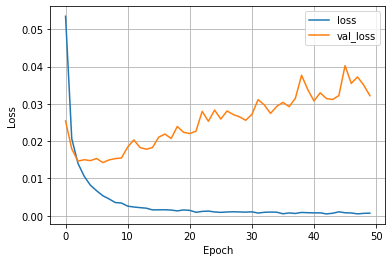

In [33]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
predictions = model.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [36]:
print(model.metrics_names)
print(model.evaluate(test_data, test_labels))

['loss', 'accuracy']
313/313 [==============================] - 1s 2ms/step - loss: 0.0322 - accuracy: 0.9808
[0.03218185901641846, 0.9807999730110168]


In [37]:
predictions = np.argmax(predictions, axis = 1)
test_labels = np.argmax(test_labels, axis=1)

In [38]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.99      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [39]:
import seaborn as sns

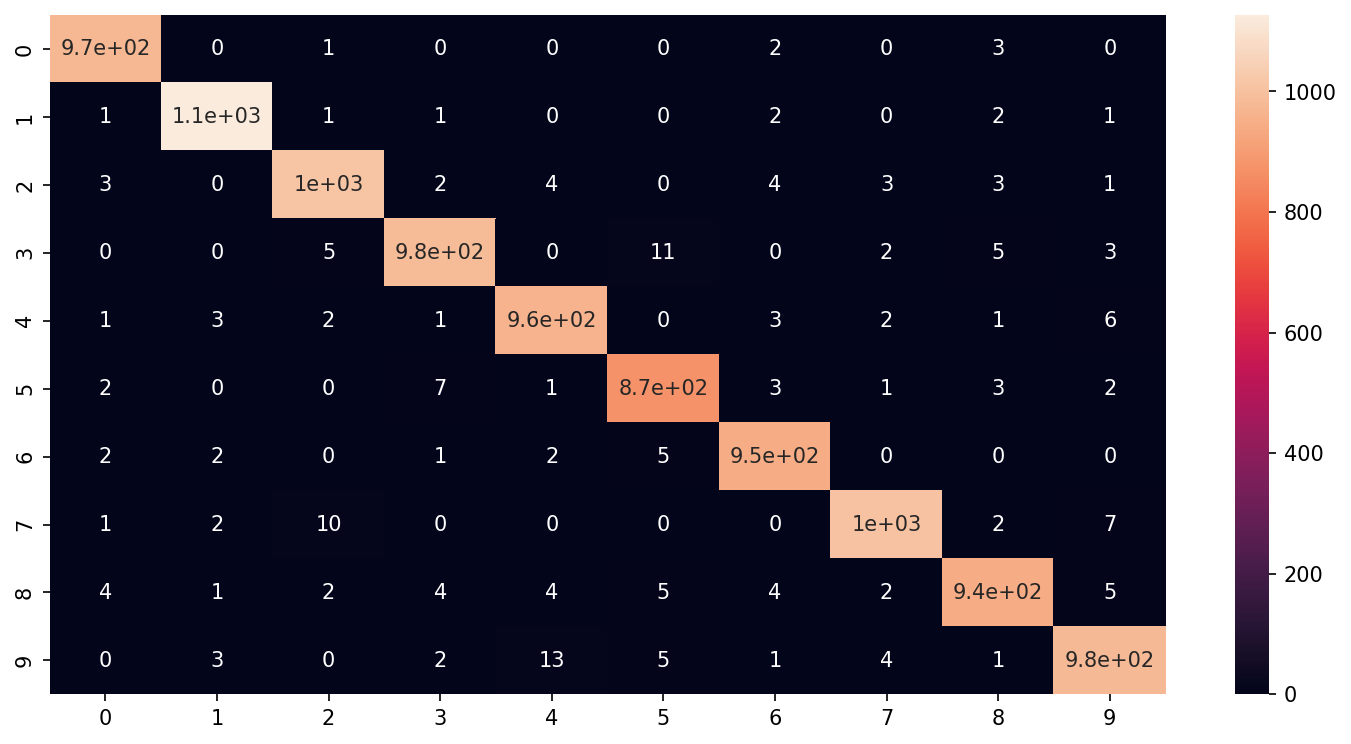

In [40]:
plt.figure(figsize=(12, 6), dpi=150)
sns.heatmap(confusion_matrix(test_labels, predictions),annot=True)

In [41]:
train_data[0].shape

(28, 28)

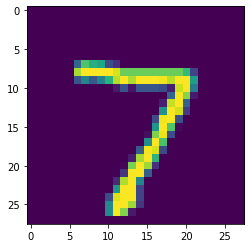

In [42]:
my_number = test_data[0]

plt.imshow(my_number.reshape(28,28))

In [43]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Pred {} Conf: {:2.0f}% True ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

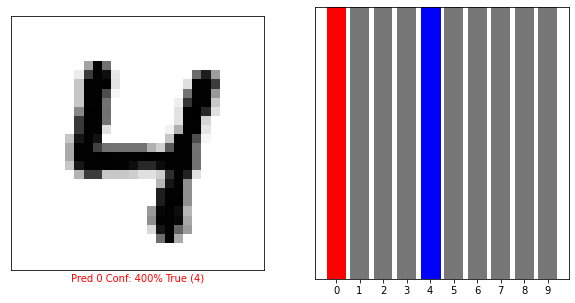

In [44]:
i = 56
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()